## Online Retail
Available at https://archive.ics.uci.edu/dataset/352/online+retail

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import calendar

In [2]:
# Uncomment to download dataset from code directly.
# !pip install ucimlrepo
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# online_retail = fetch_ucirepo(id=352) 
  
# # data (as pandas dataframes) 
# df = online_retail.data.original.copy()
  
# # metadata 
# print(online_retail.metadata) 
  
# # variable information 
# print(online_retail.variables)

In [3]:
# Disable Pandas Warning
pd.set_option('mode.chained_assignment', None)

In [4]:
# In my case, I had the data downloaded.
df_original = pd.read_excel("Online Retail.xlsx")
df = df_original.copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### Dropping Duplicates

In [5]:
print(f"Duplicated Entries: {df.duplicated().sum()}")

Duplicated Entries: 5268


In [6]:
df.drop_duplicates(inplace=True)
df.shape

(536641, 8)

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [9]:
for c in df.columns:
    print(df[c].info(), "\n")

<class 'pandas.core.series.Series'>
Index: 536641 entries, 0 to 541908
Series name: InvoiceNo
Non-Null Count   Dtype 
--------------   ----- 
536641 non-null  object
dtypes: object(1)
memory usage: 8.2+ MB
None 

<class 'pandas.core.series.Series'>
Index: 536641 entries, 0 to 541908
Series name: StockCode
Non-Null Count   Dtype 
--------------   ----- 
536641 non-null  object
dtypes: object(1)
memory usage: 8.2+ MB
None 

<class 'pandas.core.series.Series'>
Index: 536641 entries, 0 to 541908
Series name: Description
Non-Null Count   Dtype 
--------------   ----- 
535187 non-null  object
dtypes: object(1)
memory usage: 8.2+ MB
None 

<class 'pandas.core.series.Series'>
Index: 536641 entries, 0 to 541908
Series name: Quantity
Non-Null Count   Dtype
--------------   -----
536641 non-null  int64
dtypes: int64(1)
memory usage: 8.2 MB
None 

<class 'pandas.core.series.Series'>
Index: 536641 entries, 0 to 541908
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----  

In [10]:
print(f"{(135037/541908):.2%} entries are missing customer IDs.")

24.92% entries are missing customer IDs.


It seems there are missing Description And CustomerID columns.

Dropping almost 25% of tha data because of a single column that may not be relevant is not viable. Also, it is not relevant to product and country-related Data Analysis or Data Prepartion for model training. The missing IDs will be replaced with 0.

However, if it could be confirmed that the transactions without CustomerIDs are invalid, then they may be dropped.

#### Handling Missing Descriptions

In [11]:
# Trimming and standardizing descriptions
df.loc[:, "Description"] = df["Description"].str.strip()
df.loc[:, "Description"] = df["Description"].str.lower()
df["Description"].head()

0     white hanging heart t-light holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4         red woolly hottie white heart.
Name: Description, dtype: object

In [12]:
desc_na = df[df["Description"].isna()]
desc_na

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [13]:
# Group by StockCode and compute mode of Description for each group
description_mode_series = (
    df.groupby("StockCode")["Description"].apply(
        lambda x: x.mode().iloc[0] if x.shape[0] > 2 and not x.mode().empty else None
    )
)

# Convert to dictionary
description_mode = description_mode_series.dropna().to_dict()
len(description_mode)

3717

In [14]:
# Checking if one of the items has NAN as mode.
for k, v in description_mode.items():
    try:
        print(k) if np.isnan(v) else None
    except TypeError:
        pass

In [15]:
for idx in desc_na.index:
    try:
        df.loc[idx, "Description"] = description_mode[df.loc[idx, "StockCode"]]
    except KeyError:
        pass

In [16]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       155
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

The Description collumn now has 155 Null Values compared to the 1454 earlier. About 90% of the nulls were taken care.

#### Filtering rows with negative Quantity or UnitPrice

In [17]:
previous_shape = df.shape[0]

df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France


In [18]:
print(f"{previous_shape - df.shape[0]} rows with invalid data were dropped.")

11763 rows with invalid data were dropped.


#### Dropping Cancelled Transactions

In [19]:
# Find the cancelled transactions, i.e. the transactions that start with 'C'.
cancelled = df["InvoiceNo"].str.startswith("C").dropna().index
cancelled

Index([299982], dtype='int64')

In [20]:
# Drop rows using the mask
df.drop(index=cancelled, inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France


#### Dropping non-product transactions

In [21]:
non_product_codes = df[df["StockCode"].str.contains(r"^\D+$", na=False)]["StockCode"].unique()
non_product_codes

array(['POST', 'DOT', 'M', 'BANK CHARGES', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'S', 'PADS'], dtype=object)

Manual verification revealed that two of these are valid products.

In [22]:
to_remove = ["DCGSSBOY", "DCGSSGIRL"]
indices_to_remove = np.where(np.isin(non_product_codes, to_remove))
non_product_codes = np.delete(non_product_codes, indices_to_remove)
non_product_codes

array(['POST', 'DOT', 'M', 'BANK CHARGES', 'AMAZONFEE', 'm', 'S', 'PADS'],
      dtype=object)

In [23]:
previous_shape = df.shape[0]

df = df[~df["StockCode"].isin(non_product_codes)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France


In [24]:
print(f"{previous_shape - df.shape[0]} rows containing non-products were dropped.")

2168 rows containing non-products were dropped.


#### Consolidating Datatypes

In [25]:
df["InvoiceNo"] = df["InvoiceNo"].astype(int)
df["InvoiceNo"].info()

<class 'pandas.core.series.Series'>
Index: 522709 entries, 0 to 541908
Series name: InvoiceNo
Non-Null Count   Dtype
--------------   -----
522709 non-null  int32
dtypes: int32(1)
memory usage: 6.0 MB


In [26]:
# As mentioned earlier the missing values in 'CustomerID' will be replaced with 0.
df["CustomerID"].fillna(0, inplace=True)
df["CustomerID"].info()

<class 'pandas.core.series.Series'>
Index: 522709 entries, 0 to 541908
Series name: CustomerID
Non-Null Count   Dtype  
--------------   -----  
522709 non-null  float64
dtypes: float64(1)
memory usage: 8.0 MB


C:\Users\mishr\AppData\Local\Temp\ipykernel_30684\2004140144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CustomerID"].fillna(0, inplace=True)


In [27]:
df["CustomerID"] = df["CustomerID"].astype(int)
df["CustomerID"].info()

<class 'pandas.core.series.Series'>
Index: 522709 entries, 0 to 541908
Series name: CustomerID
Non-Null Count   Dtype
--------------   -----
522709 non-null  int32
dtypes: int32(1)
memory usage: 6.0 MB


### Generating Additional Data
#### Revenue

In [28]:
df.loc[:, "Revenue"] = df["Quantity"] * df["UnitPrice"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [30]:
df.loc[:, 'date'] = pd.to_datetime(df.loc[:, 'InvoiceDate'].dt.date)
df.loc[:, "day"] = df.loc[:, "InvoiceDate"].dt.day
df.loc[:, "month"] = pd.Categorical(df.loc[:, "InvoiceDate"].dt.month_name(), list(calendar.month_name)[1:])
df.loc[:, "year"] = df.loc[:, "InvoiceDate"].dt.year
df.loc[:, "day_of_week"] = pd.Categorical(df.loc[:, "InvoiceDate"].dt.day_name(), list(calendar.day_name))
df.loc[:, "time"] = df.loc[:, "InvoiceDate"].dt.time
df.loc[:, "hour"] = df.loc[:, "InvoiceDate"].dt.hour
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,day,month,year,day_of_week,time,hour
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,1,December,2010,Wednesday,08:26:00,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,1,December,2010,Wednesday,08:26:00,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-09,9,December,2011,Friday,12:50:00,12
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-09,9,December,2011,Friday,12:50:00,12
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,9,December,2011,Friday,12:50:00,12
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,9,December,2011,Friday,12:50:00,12


In [31]:
# Finding the item with most Revenue
revenue_per_item = df.groupby(by="StockCode")["Revenue"].sum().reset_index()
most_revenue_code = revenue_per_item.loc[revenue_per_item["Revenue"].idxmax()]["StockCode"]

print(f"Item with most revenue: {description_mode[most_revenue_code]}")

Item with most revenue: regency cakestand 3 tier


In [32]:
# Finding the item with most orders
most_orders = df["StockCode"].mode()[0]

print(f"Item with most Orders: {description_mode[most_orders]}")

Item with most Orders: white hanging heart t-light holder


In [33]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'date', 'day', 'month',
       'year', 'day_of_week', 'time', 'hour'],
      dtype='object')

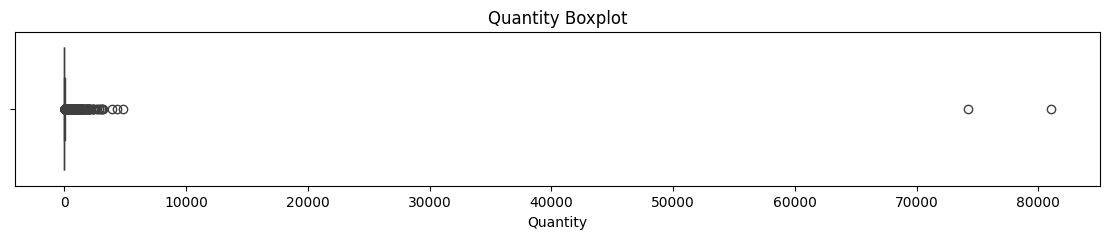

In [34]:
plt.figure(figsize=(14, 2))
sns.boxplot(df["Quantity"], orient="h")
plt.title("Quantity Boxplot")
plt.show()

In [35]:
qty_details = df["Quantity"].describe()
qty_details

count    522709.000000
mean         10.639876
std         156.568902
min           1.000000
25%           1.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [36]:
qty_IQR = qty_details["75%"] - qty_details["25%"]
qty_IQR

11.0

In [37]:
# I have went with 3 in the IQR method instead of 1.5 to preserve more data.

# Uncomment to use 1.5 instead of 3.
# qty_inner_bound = qty_details["75%"] + (1.5 * qty_IQR)
# df[df["Quantity"] < qty_inner_bound]

qty_outer_bound = qty_details["75%"] + (3 * qty_IQR)
df[df["Quantity"] <= qty_outer_bound].shape

(503557, 16)

In [38]:
df["is_outlier"] = df["Quantity"] > qty_outer_bound
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,day,month,year,day_of_week,time,hour,is_outlier
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-09,9,December,2011,Friday,12:50:00,12,False
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-09,9,December,2011,Friday,12:50:00,12,False
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,9,December,2011,Friday,12:50:00,12,False
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,9,December,2011,Friday,12:50:00,12,False


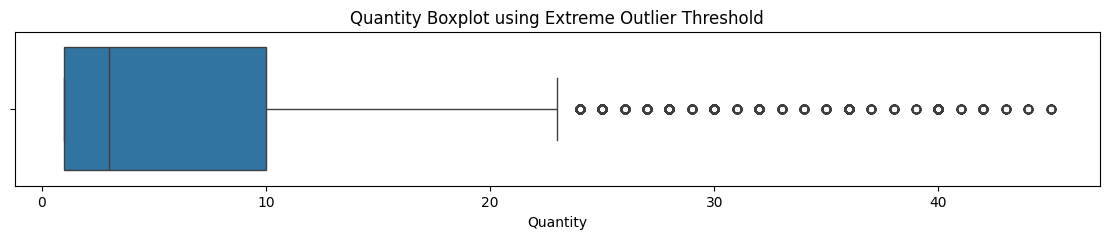

In [39]:
plt.figure(figsize=(14, 2))
sns.boxplot(df[df["is_outlier"] == False]["Quantity"], orient="h")
plt.title("Quantity Boxplot using Extreme Outlier Threshold")
plt.show()

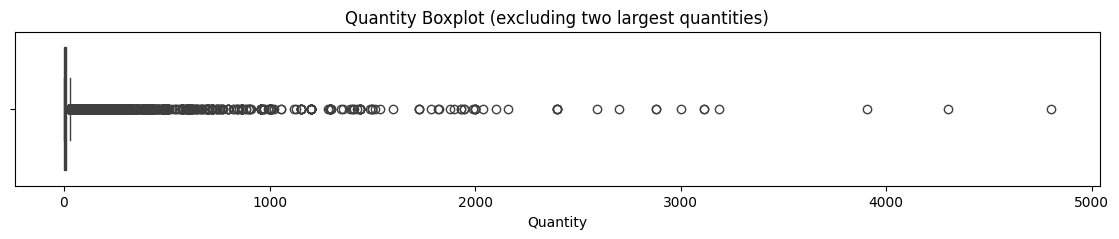

In [40]:
plt.figure(figsize=(14, 2))
sns.boxplot(df[df["Quantity"] < 10000]["Quantity"], orient="h")
plt.title("Quantity Boxplot (excluding two largest quantities)")
plt.show()

In [41]:
# Group by StockCode and aggregate UnitPrice stats
price_summary = df.groupby("StockCode")["UnitPrice"].agg(
    mean = "mean",
    median = "median",
    mode = lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else None,
    std_dev = "std",
    min_price = "min",
    max_price = "max",
    unique_price_count = "nunique"
).reset_index()
price_summary["transactions"] = df.groupby("StockCode")["UnitPrice"].count().values
price_summary

,StockCode,mean,median,mode,std_dev,min_price,max_price,unique_price_count,transactions
0,10002,1.086620,0.85,0.85,0.367792,0.85,1.66,3,71
1,10080,0.410909,0.39,0.39,0.098072,0.39,0.85,2,22
2,10120,0.210000,0.21,0.21,0.000000,0.21,0.21,1,29
3,10125,0.859785,0.85,0.85,0.274052,0.42,1.66,6,93
4,10133,0.652551,0.79,0.42,0.249086,0.42,1.66,7,196
...,...,...,...,...,...,...,...,...,...
3908,gift_0001_10,8.330000,8.33,8.33,0.000000,8.33,8.33,1,8
3909,gift_0001_20,16.708889,16.67,16.67,0.116667,16.67,17.02,2,9
3910,gift_0001_30,25.075714,25.00,25.00,0.200321,25.00,25.53,2,7
3911,gift_0001_40,33.566667,33.33,33.33,0.409919,33.33,34.04,2,3


In [42]:
price_summary["relative_std_dev"] = price_summary["std_dev"] / price_summary["mean"]
price_summary

,StockCode,mean,median,mode,std_dev,min_price,max_price,unique_price_count,transactions,relative_std_dev
0,10002,1.086620,0.85,0.85,0.367792,0.85,1.66,3,71,0.338474
1,10080,0.410909,0.39,0.39,0.098072,0.39,0.85,2,22,0.238672
2,10120,0.210000,0.21,0.21,0.000000,0.21,0.21,1,29,0.000000
3,10125,0.859785,0.85,0.85,0.274052,0.42,1.66,6,93,0.318744
4,10133,0.652551,0.79,0.42,0.249086,0.42,1.66,7,196,0.381711
...,...,...,...,...,...,...,...,...,...,...
3908,gift_0001_10,8.330000,8.33,8.33,0.000000,8.33,8.33,1,8,0.000000
3909,gift_0001_20,16.708889,16.67,16.67,0.116667,16.67,17.02,2,9,0.006982
3910,gift_0001_30,25.075714,25.00,25.00,0.200321,25.00,25.53,2,7,0.007989
3911,gift_0001_40,33.566667,33.33,33.33,0.409919,33.33,34.04,2,3,0.012212


In [43]:
# Find products with maximum standard deviation.
price_summary.loc[price_summary["std_dev"].nlargest(10).index, :]

,StockCode,mean,median,mode,std_dev,min_price,max_price,unique_price_count,transactions,relative_std_dev
1456,22656,146.750000,125.000,125.00,66.039761,50.00,295.00,3,20,0.450015
1455,22655,143.421053,125.000,125.00,62.136568,50.00,295.00,3,38,0.433246
1620,22826,114.024390,85.000,85.00,48.621234,85.00,195.00,3,41,0.426411
1309,22502,10.302339,5.950,5.95,42.058484,2.00,649.50,8,466,4.082421
1627,22833,56.508000,49.950,49.95,25.435572,32.69,100.00,3,5,0.450123
719,21769,66.360000,66.360,52.77,19.219162,52.77,79.95,2,2,0.289620
1847,23064,45.487391,49.950,49.95,17.964517,10.00,99.96,4,23,0.394934
539,21473,23.760000,19.950,19.95,17.459613,19.95,99.96,2,21,0.734832
1561,22764,33.286667,24.950,24.95,14.439530,24.95,49.96,2,3,0.433793
1566,22769,37.610000,37.985,51.02,14.369486,21.95,51.02,3,8,0.382066


In [44]:
price_summary.loc[price_summary["relative_std_dev"].nlargest(10).index, :]

,StockCode,mean,median,mode,std_dev,min_price,max_price,unique_price_count,transactions,relative_std_dev
1309,22502,10.302339,5.95,5.95,42.058484,2.00,649.50,8,466,4.082421
3569,85160B,1.366471,0.39,0.39,3.810166,0.39,16.13,3,17,2.788326
2749,85175,0.985455,0.42,0.42,2.615406,0.36,13.57,5,143,2.654009
2746,85172,0.689565,0.42,0.42,1.774815,0.42,12.46,3,46,2.573818
1734,22944,1.318860,0.97,0.39,2.908240,0.39,16.13,6,114,2.205117
2441,37468,0.933846,0.39,0.39,1.960865,0.39,7.46,2,13,2.099773
27,16218,0.269844,0.06,0.06,0.551594,0.06,2.13,6,64,2.044122
3006,37479P,2.233636,0.39,0.39,4.202937,0.39,16.98,5,33,1.881657
3157,79030D,1.472128,0.39,0.39,2.716835,0.39,12.72,6,47,1.845516
162,20835,2.103750,0.83,0.83,3.602709,0.83,11.02,2,8,1.712518


In [45]:
# Find the StockCode of the product with highest RSD.
high_rsd_code = price_summary.loc[price_summary["relative_std_dev"].idxmax(), :]["StockCode"]
high_rsd_code

22502

In [46]:
df[df["StockCode"] == high_rsd_code]["UnitPrice"].value_counts()

UnitPrice
5.95      209
10.79      98
8.29       96
4.95       30
8.47       29
649.50      2
8.95        1
2.00        1
Name: count, dtype: int64

As seen in the above cell, the 2 transactions are values much higher than the usual price.
Ideally these values should be removed, but confirming the action would be better.
As such these entries will be left as is.

### Country-based calculations

In [47]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,day,month,year,day_of_week,time,hour,is_outlier
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-09,9,December,2011,Friday,12:50:00,12,False
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-09,9,December,2011,Friday,12:50:00,12,False
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,9,December,2011,Friday,12:50:00,12,False
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,9,December,2011,Friday,12:50:00,12,False


In [48]:
country_summary = df.groupby("Country").agg(
    mean_quantity=("Quantity", "mean"),
    median_quantity=("Quantity", "median"),
    total_quantity=("Quantity", "sum"),
    
    mean_revenue=("Revenue", "mean"),
    median_revenue=("Revenue", "median"),
    total_revenue=("Revenue", "sum"),
    
    total_transactions=("InvoiceNo", "nunique")
).reset_index()

country_summary["avg_revenue_per_transaction"] = (
    country_summary["total_revenue"] / country_summary["total_transactions"]
)

country_summary["avg_quantity_per_transaction"] = (
    country_summary["total_quantity"] / country_summary["total_transactions"]
)

country_summary

,Country,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction
0,Australia,71.093220,32.0,83890,117.037127,66.00,138103.81,56,2466.139464,1498.035714
1,Austria,12.614583,10.0,4844,22.767396,17.00,8742.68,17,514.275294,284.941176
2,Bahrain,17.444444,6.0,314,41.896667,25.50,754.14,3,251.380000,104.666667
3,Belgium,11.866667,10.0,22962,19.083897,16.60,36927.34,98,376.809592,234.306122
4,Brazil,11.125000,10.0,356,35.737500,19.65,1143.60,1,1143.600000,356.000000
5,Canada,18.413333,12.0,2762,20.769600,16.50,3115.44,5,623.088000,552.400000
6,Channel Islands,12.713137,10.0,9484,27.007426,17.70,20147.54,25,805.901600,379.360000
7,Cyprus,10.545757,6.0,6338,21.908752,16.50,13167.16,14,940.511429,452.714286
8,Czech Republic,27.916667,24.0,670,32.780833,30.60,786.74,2,393.370000,335.000000
9,Denmark,22.324251,12.0,8193,49.622180,23.40,18211.34,18,1011.741111,455.166667


In [49]:
# Top 10 countries with most Revenue

country_summary.loc[country_summary["total_revenue"].nlargest(10).index, :]

,Country,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction
36,United Kingdom,9.686498,3.0,4639174,18.220968,8.50,8726604.48,17901,487.492569,259.157254
24,Netherlands,86.243755,72.0,200258,122.260698,92.16,283889.34,93,3052.573548,2153.311828
10,EIRE,18.669291,12.0,147002,35.063609,17.40,276090.86,284,972.150915,517.612676
14,Germany,13.656369,12.0,118032,23.762715,16.95,205381.15,443,463.614334,266.437923
13,France,13.754050,10.0,111229,22.836528,16.50,184679.00,383,482.190601,290.415144
0,Australia,71.093220,32.0,83890,117.037127,66.00,138103.81,56,2466.139464,1498.035714
31,Spain,11.470418,6.0,27724,23.047811,15.00,55706.56,88,633.029091,315.045455
33,Switzerland,15.835496,12.0,30515,27.537935,17.70,53065.60,50,1061.312000,610.300000
20,Japan,81.046729,48.0,26016,116.561900,70.20,37416.37,19,1969.282632,1369.263158
3,Belgium,11.866667,10.0,22962,19.083897,16.60,36927.34,98,376.809592,234.306122


Country with most Revenue: United Kingdom
Given that the retailer is based in UK, this result is not surprising.

Let's look at the country with second highest total revenue: Netherlands
It's total transactions are less than 1% on UK, but the average revenue and quantity per transaction are much higher.

In [50]:
# Top 10 countries with highest average revenue per transanction.

country_summary.loc[country_summary["avg_revenue_per_transaction"].nlargest(10).index, :]

,Country,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction
24,Netherlands,86.243755,72.0,200258,122.260698,92.16,283889.34,93,3052.573548,2153.311828
0,Australia,71.093220,32.0,83890,117.037127,66.00,138103.81,56,2466.139464,1498.035714
30,Singapore,24.344186,12.0,5234,42.420419,34.80,9120.39,4,2280.097500,1308.500000
20,Japan,81.046729,48.0,26016,116.561900,70.20,37416.37,19,1969.282632,1369.263158
21,Lebanon,8.577778,8.0,386,37.641778,31.60,1693.88,1,1693.880000,386.000000
16,Hong Kong,17.120000,12.0,4708,35.433418,23.40,9744.19,7,1392.027143,672.571429
4,Brazil,11.125000,10.0,356,35.737500,19.65,1143.60,1,1143.600000,356.000000
32,Sweden,84.395785,24.0,36037,86.250187,30.00,36828.83,34,1083.200882,1059.911765
33,Switzerland,15.835496,12.0,30515,27.537935,17.70,53065.60,50,1061.312000,610.300000
18,Israel,15.089041,12.0,4406,27.840445,18.00,8129.41,8,1016.176250,550.750000


In [51]:
# Top 10 countries with highest average quantity per transanction.

country_summary.loc[country_summary["avg_quantity_per_transaction"].nlargest(10).index, :]

,Country,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction
24,Netherlands,86.243755,72.0,200258,122.260698,92.16,283889.34,93,3052.573548,2153.311828
0,Australia,71.093220,32.0,83890,117.037127,66.00,138103.81,56,2466.139464,1498.035714
20,Japan,81.046729,48.0,26016,116.561900,70.20,37416.37,19,1969.282632,1369.263158
30,Singapore,24.344186,12.0,5234,42.420419,34.80,9120.39,4,2280.097500,1308.500000
32,Sweden,84.395785,24.0,36037,86.250187,30.00,36828.83,34,1083.200882,1059.911765
16,Hong Kong,17.120000,12.0,4708,35.433418,23.40,9744.19,7,1392.027143,672.571429
33,Switzerland,15.835496,12.0,30515,27.537935,17.70,53065.60,50,1061.312000,610.300000
25,Norway,18.393130,12.0,19276,30.968168,19.80,32454.64,32,1014.207500,602.375000
5,Canada,18.413333,12.0,2762,20.769600,16.50,3115.44,5,623.088000,552.400000
18,Israel,15.089041,12.0,4406,27.840445,18.00,8129.41,8,1016.176250,550.750000


In [52]:
# Top 10 countries with highest average revenue in general.

country_summary.loc[country_summary["mean_revenue"].nlargest(10).index, :]

,Country,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction
24,Netherlands,86.243755,72.0,200258,122.260698,92.16,283889.34,93,3052.573548,2153.311828
0,Australia,71.093220,32.0,83890,117.037127,66.00,138103.81,56,2466.139464,1498.035714
20,Japan,81.046729,48.0,26016,116.561900,70.20,37416.37,19,1969.282632,1369.263158
32,Sweden,84.395785,24.0,36037,86.250187,30.00,36828.83,34,1083.200882,1059.911765
9,Denmark,22.324251,12.0,8193,49.622180,23.40,18211.34,18,1011.741111,455.166667
22,Lithuania,18.628571,16.0,652,47.458857,45.00,1661.06,4,415.265000,163.000000
30,Singapore,24.344186,12.0,5234,42.420419,34.80,9120.39,4,2280.097500,1308.500000
2,Bahrain,17.444444,6.0,314,41.896667,25.50,754.14,3,251.380000,104.666667
21,Lebanon,8.577778,8.0,386,37.641778,31.60,1693.88,1,1693.880000,386.000000
4,Brazil,11.125000,10.0,356,35.737500,19.65,1143.60,1,1143.600000,356.000000


In [53]:
# Top 10 countries with highest average quantity in general.

country_summary.loc[country_summary["mean_quantity"].nlargest(10).index, :]

,Country,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction
24,Netherlands,86.243755,72.0,200258,122.260698,92.16,283889.34,93,3052.573548,2153.311828
32,Sweden,84.395785,24.0,36037,86.250187,30.00,36828.83,34,1083.200882,1059.911765
20,Japan,81.046729,48.0,26016,116.561900,70.20,37416.37,19,1969.282632,1369.263158
0,Australia,71.093220,32.0,83890,117.037127,66.00,138103.81,56,2466.139464,1498.035714
8,Czech Republic,27.916667,24.0,670,32.780833,30.60,786.74,2,393.370000,335.000000
30,Singapore,24.344186,12.0,5234,42.420419,34.80,9120.39,4,2280.097500,1308.500000
9,Denmark,22.324251,12.0,8193,49.622180,23.40,18211.34,18,1011.741111,455.166667
10,EIRE,18.669291,12.0,147002,35.063609,17.40,276090.86,284,972.150915,517.612676
22,Lithuania,18.628571,16.0,652,47.458857,45.00,1661.06,4,415.265000,163.000000
5,Canada,18.413333,12.0,2762,20.769600,16.50,3115.44,5,623.088000,552.400000


Based on the previous tables, it is clear that Netherlands orders relatively more bulk orders than other countires,
even though there are fewer trnsactions. Each transaction from Netherlands is more likely to have a higher order quantity and generate higher revenue as well.

Australia, Switzerland, Sweden and Japan are also some countires that are more likely to generate more income per transaction.

While Singapore is also in the list, there are too few transactions happening from Singapore.

In [54]:
# Top 10 countries with most transactions.

country_summary.loc[country_summary["total_transactions"].nlargest(10).index, :]

,Country,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction
36,United Kingdom,9.686498,3.0,4639174,18.220968,8.50,8726604.48,17901,487.492569,259.157254
14,Germany,13.656369,12.0,118032,23.762715,16.95,205381.15,443,463.614334,266.437923
13,France,13.754050,10.0,111229,22.836528,16.50,184679.00,383,482.190601,290.415144
10,EIRE,18.669291,12.0,147002,35.063609,17.40,276090.86,284,972.150915,517.612676
3,Belgium,11.866667,10.0,22962,19.083897,16.60,36927.34,98,376.809592,234.306122
24,Netherlands,86.243755,72.0,200258,122.260698,92.16,283889.34,93,3052.573548,2153.311828
31,Spain,11.470418,6.0,27724,23.047811,15.00,55706.56,88,633.029091,315.045455
0,Australia,71.093220,32.0,83890,117.037127,66.00,138103.81,56,2466.139464,1498.035714
27,Portugal,11.083162,10.0,16126,18.523100,15.60,26951.11,50,539.022200,322.520000
33,Switzerland,15.835496,12.0,30515,27.537935,17.70,53065.60,50,1061.312000,610.300000


Germany, France and EIRE also have numerous transactions on the platform.
EIRE has a closer total revenue to Netherlands, but nearly 3 times as many transactions.

In [55]:
# Top 10 countries with most quantity.

country_summary.loc[country_summary["total_quantity"].nlargest(10).index, :]

,Country,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction
36,United Kingdom,9.686498,3.0,4639174,18.220968,8.50,8726604.48,17901,487.492569,259.157254
24,Netherlands,86.243755,72.0,200258,122.260698,92.16,283889.34,93,3052.573548,2153.311828
10,EIRE,18.669291,12.0,147002,35.063609,17.40,276090.86,284,972.150915,517.612676
14,Germany,13.656369,12.0,118032,23.762715,16.95,205381.15,443,463.614334,266.437923
13,France,13.754050,10.0,111229,22.836528,16.50,184679.00,383,482.190601,290.415144
0,Australia,71.093220,32.0,83890,117.037127,66.00,138103.81,56,2466.139464,1498.035714
32,Sweden,84.395785,24.0,36037,86.250187,30.00,36828.83,34,1083.200882,1059.911765
33,Switzerland,15.835496,12.0,30515,27.537935,17.70,53065.60,50,1061.312000,610.300000
31,Spain,11.470418,6.0,27724,23.047811,15.00,55706.56,88,633.029091,315.045455
20,Japan,81.046729,48.0,26016,116.561900,70.20,37416.37,19,1969.282632,1369.263158


Netherlands has the second most quantity ordered after UK, followed by EIRE.

In [56]:
country_summary["revenue_per_item"] = country_summary["total_revenue"] / country_summary["total_quantity"]

In [57]:
# Top 10 countries with most revernue per item.

country_summary.loc[country_summary["revenue_per_item"].nlargest(10).index, :]

,Country,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction,revenue_per_item
21,Lebanon,8.577778,8.0,386,37.641778,31.60,1693.88,1,1693.880000,386.000000,4.388290
4,Brazil,11.125000,10.0,356,35.737500,19.65,1143.60,1,1143.600000,356.000000,3.212360
28,RSA,6.157895,6.0,351,17.584386,16.50,1002.31,1,1002.310000,351.000000,2.855584
15,Greece,10.915493,11.0,1550,31.165634,16.60,4425.52,5,885.104000,310.000000,2.855174
22,Lithuania,18.628571,16.0,652,47.458857,45.00,1661.06,4,415.265000,163.000000,2.547638
2,Bahrain,17.444444,6.0,314,41.896667,25.50,754.14,3,251.380000,104.666667,2.401720
11,European Community,8.596491,6.0,490,20.337719,17.70,1159.25,3,386.416667,163.333333,2.365816
9,Denmark,22.324251,12.0,8193,49.622180,23.40,18211.34,18,1011.741111,455.166667,2.222793
23,Malta,8.788991,6.0,958,18.996239,17.00,2070.59,5,414.118000,191.600000,2.161367
6,Channel Islands,12.713137,10.0,9484,27.007426,17.70,20147.54,25,805.901600,379.360000,2.124372


Countries like Lebanon and Brazil order more premium products.
But with 1 transaction each, they won't amount to much in the long run.

Instead, Channel Islands and Denmark have a relatively higher number of transactions, while being amoung the top 10 countries ordering more premium products.

In [58]:
country_summary["revenue_share"] = country_summary["total_revenue"] / country_summary["total_revenue"].sum()
country_summary["quantity_share"] = country_summary["total_quantity"] / country_summary["total_quantity"].sum()

In [59]:
country_summary

,Country,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction,revenue_per_item,revenue_share,quantity_share
0,Australia,71.093220,32.0,83890,117.037127,66.00,138103.81,56,2466.139464,1498.035714,1.646249,0.013467,0.015084
1,Austria,12.614583,10.0,4844,22.767396,17.00,8742.68,17,514.275294,284.941176,1.804847,0.000853,0.000871
2,Bahrain,17.444444,6.0,314,41.896667,25.50,754.14,3,251.380000,104.666667,2.401720,0.000074,0.000056
3,Belgium,11.866667,10.0,22962,19.083897,16.60,36927.34,98,376.809592,234.306122,1.608194,0.003601,0.004129
4,Brazil,11.125000,10.0,356,35.737500,19.65,1143.60,1,1143.600000,356.000000,3.212360,0.000112,0.000064
5,Canada,18.413333,12.0,2762,20.769600,16.50,3115.44,5,623.088000,552.400000,1.127965,0.000304,0.000497
6,Channel Islands,12.713137,10.0,9484,27.007426,17.70,20147.54,25,805.901600,379.360000,2.124372,0.001965,0.001705
7,Cyprus,10.545757,6.0,6338,21.908752,16.50,13167.16,14,940.511429,452.714286,2.077494,0.001284,0.001140
8,Czech Republic,27.916667,24.0,670,32.780833,30.60,786.74,2,393.370000,335.000000,1.174239,0.000077,0.000120
9,Denmark,22.324251,12.0,8193,49.622180,23.40,18211.34,18,1011.741111,455.166667,2.222793,0.001776,0.001473


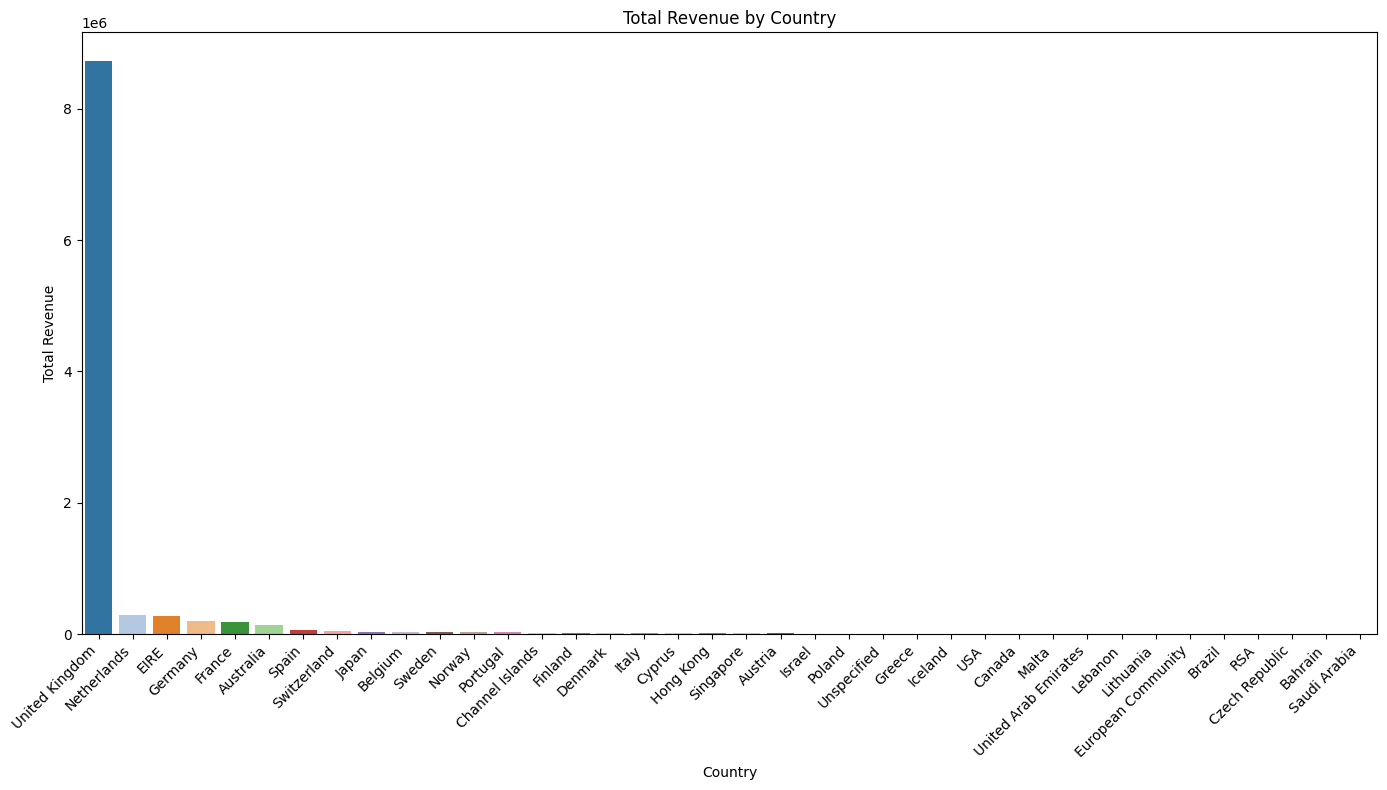

In [60]:
# Sort countries by total revenue for better readability
country_sorted = country_summary.sort_values(by="total_revenue", ascending=False)

# Set the plot size
plt.figure(figsize=(14, 8))

# Create the barplot
sns.barplot(
    data=country_sorted,
    x="Country",
    y="total_revenue",
    hue="Country",
    palette="tab20"  # Use a colorful palette for distinction
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Country")

# Display the plot
plt.tight_layout()
plt.show()

In [61]:
fig = px.treemap(country_summary, 
                 path=["Country"], 
                 values="total_revenue",
                 title="Total Revenue by Country",
                 color="Country")

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

fig.show()

United Kingdom accounts for over 80% of the Revenue. With United Kingdom present in the context, the charts become skewed and it is difficult to see the distribution of other countries.

Here are the above two graphs, but with the data of United Kingdom removed, to more clearly show the Revenues of other countries.

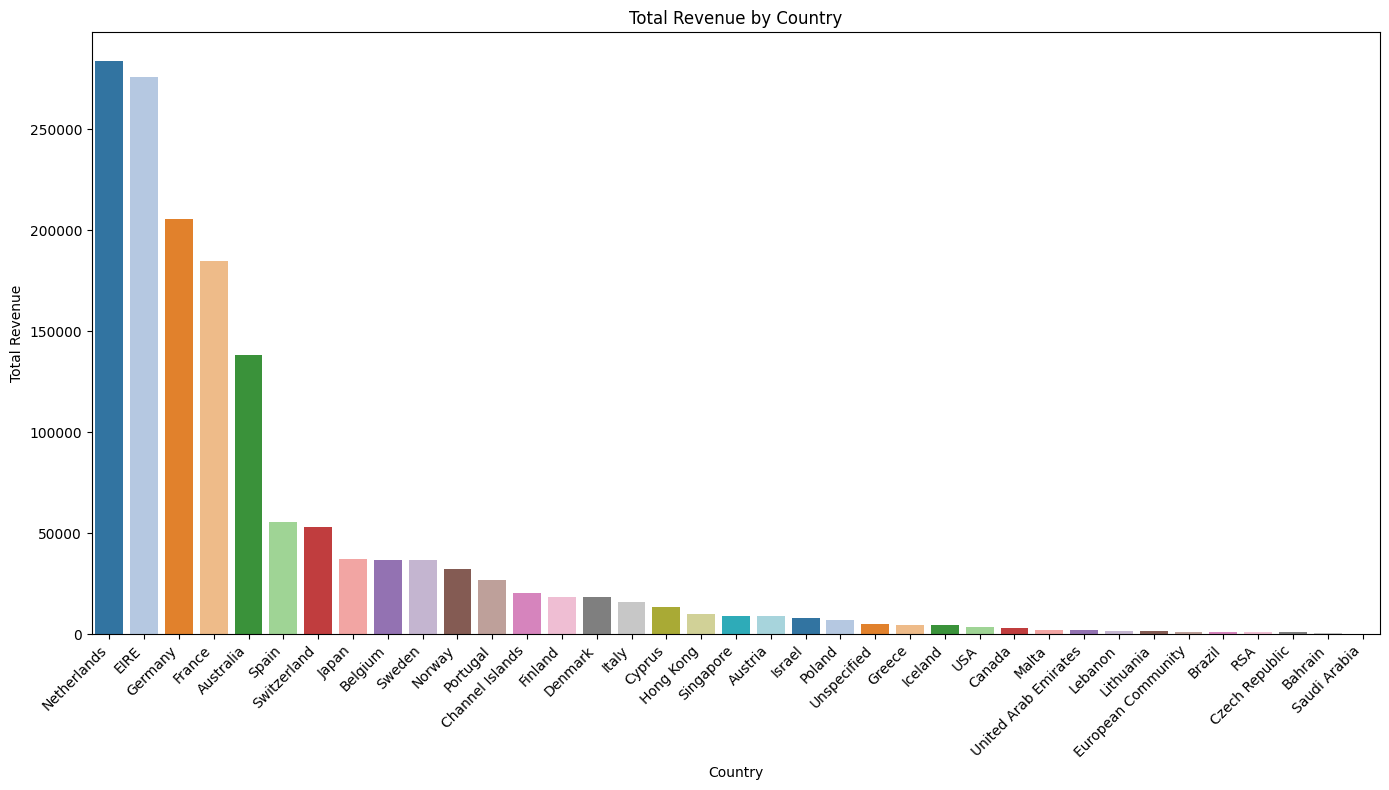

In [62]:
# Sort countries by total revenue for better readability
country_sorted = country_summary[country_summary["Country"] != "United Kingdom"].sort_values(
    by="total_revenue", ascending=False
)

# Set the plot size
plt.figure(figsize=(14, 8))

# Create the barplot
sns.barplot(
    data=country_sorted,
    x="Country",
    y="total_revenue",
    hue="Country",
    palette="tab20"  # Use a colorful palette for distinction
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Country")

# Display the plot
plt.tight_layout()
plt.show()

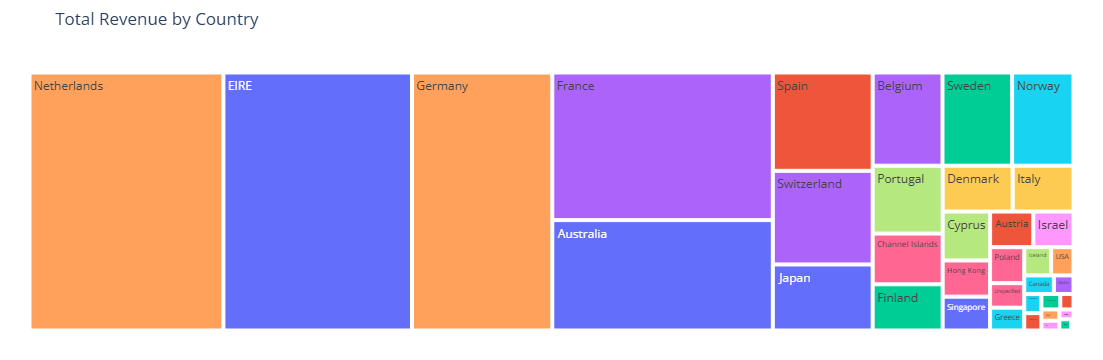

In [75]:
fig = px.treemap(country_summary[country_summary["Country"] != "United Kingdom"], 
                 path=["Country"], 
                 values="total_revenue",
                 title="Total Revenue by Country",
                 color="Country")

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

fig.show()

### Customer-based Calculations

In [64]:
customer_summary = df[df["CustomerID"] != 0].groupby("CustomerID").agg(
    mean_quantity=("Quantity", "mean"),
    median_quantity=("Quantity", "median"),
    total_quantity=("Quantity", "sum"),
    
    mean_revenue=("Revenue", "mean"),
    median_revenue=("Revenue", "median"),
    total_revenue=("Revenue", "sum"),
    
    total_transactions=("InvoiceNo", "nunique")
).reset_index()

customer_summary["avg_revenue_per_transaction"] = (
    customer_summary["total_revenue"] / customer_summary["total_transactions"]
)

customer_summary["avg_quantity_per_transaction"] = (
    customer_summary["total_quantity"] / customer_summary["total_transactions"]
)

customer_summary["revenue_per_item"] = customer_summary["total_revenue"] / customer_summary["total_quantity"]

customer_summary

,CustomerID,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction,revenue_per_item
0,12346,74215.000000,74215.0,74215,77183.600000,77183.60,77183.60,1,77183.600000,74215.000000,1.040000
1,12347,13.505495,12.0,2458,23.681319,17.00,4310.00,7,615.714286,351.142857,1.753458
2,12348,86.370370,80.0,2332,53.231111,41.76,1437.24,4,359.310000,583.000000,0.616312
3,12349,8.750000,6.0,630,20.243750,17.70,1457.55,1,1457.550000,630.000000,2.313571
4,12350,12.250000,12.0,196,18.400000,18.75,294.40,1,294.400000,196.000000,1.502041
...,...,...,...,...,...,...,...,...,...,...,...
4329,18280,4.500000,4.0,45,18.060000,17.70,180.60,1,180.600000,45.000000,4.013333
4330,18281,7.714286,10.0,54,11.545714,15.30,80.82,1,80.820000,54.000000,1.496667
4331,18282,8.583333,5.0,103,14.837500,13.71,178.05,2,89.025000,51.500000,1.728641
4332,18283,1.884562,1.0,1355,2.836690,2.08,2039.58,16,127.473750,84.687500,1.505225


In [65]:
# Top 10 customers with the most transactions

customer_summary.loc[customer_summary["total_transactions"].nlargest(10).index, :]

,CustomerID,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction,revenue_per_item
326,12748,5.697294,2.0,25051,7.198267,3.48,31650.78,206,153.644563,121.606796,1.263454
1879,14911,14.156316,10.0,80238,24.759497,17.00,140336.83,199,705.210201,403.206030,1.749007
4007,17841,2.975871,1.0,22816,5.281856,2.95,40495.99,124,326.580565,184.000000,1.774894
562,13089,17.103087,12.0,31025,32.393649,19.92,58762.08,97,605.794639,319.845361,1.894024
2176,15311,16.122992,2.0,38147,25.626691,5.95,60632.75,91,666.293956,419.197802,1.589450
1661,14606,2.310022,1.0,6177,4.460041,2.55,11926.15,90,132.512778,68.633333,1.930735
481,12971,30.455738,12.0,9289,36.688230,20.40,11189.91,86,130.115233,108.011628,1.204641
1689,14646,95.555340,72.0,196844,135.503893,105.60,279138.02,72,3876.916944,2733.944444,1.418067
795,13408,33.958159,24.0,16232,58.822259,45.00,28117.04,62,453.500645,261.806452,1.732198
2700,16029,167.112500,100.0,40107,302.950375,174.00,72708.09,62,1172.711129,646.887097,1.812853


In [66]:
# Top 10 customers with most revenue

customer_summary.loc[customer_summary["total_revenue"].nlargest(10).index, :]

,CustomerID,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction,revenue_per_item
1689,14646,95.555340,72.0,196844,135.503893,105.60,279138.02,72,3876.916944,2733.944444,1.418067
4197,18102,148.779582,108.0,64124,602.453132,394.80,259657.30,60,4327.621667,1068.733333,4.049300
3725,17450,208.252976,96.0,69973,578.544018,294.48,194390.79,46,4225.886739,1521.152174,2.778083
3006,16446,26999.000000,1.0,80997,56157.500000,1.65,168472.50,2,84236.250000,40498.500000,2.079984
1879,14911,14.156316,10.0,80238,24.759497,17.00,140336.83,199,705.210201,403.206030,1.749007
55,12415,108.517532,96.0,77373,174.704811,135.00,124564.53,20,6228.226500,3868.650000,1.609922
1333,14156,41.410753,12.0,57768,84.021563,22.50,117210.08,55,2131.092364,1050.327273,2.028979
3768,17511,67.029076,48.0,64549,94.561142,75.60,91062.38,31,2937.496129,2082.225806,1.410748
0,12346,74215.000000,74215.0,74215,77183.600000,77183.60,77183.60,1,77183.600000,74215.000000,1.040000
2700,16029,167.112500,100.0,40107,302.950375,174.00,72708.09,62,1172.711129,646.887097,1.812853


In [67]:
# Top 10 customers who spend most per transaction

customer_summary.loc[customer_summary["avg_revenue_per_transaction"].nlargest(10).index, :]

,CustomerID,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction,revenue_per_item
3006,16446,26999.000000,1.0,80997,56157.500000,1.65,168472.50,2,84236.250000,40498.500000,2.079984
0,12346,74215.000000,74215.0,74215,77183.600000,77183.60,77183.60,1,77183.600000,74215.000000,1.040000
2502,15749,1802.800000,1930.0,18028,4453.430000,4388.50,44534.30,3,14844.766667,6009.333333,2.470285
2011,15098,40.333333,60.0,121,13305.500000,649.50,39916.50,3,13305.500000,40.333333,329.888430
196,12590,63.910448,50.0,4282,139.421791,122.40,9341.26,1,9341.260000,4282.000000,2.181518
55,12415,108.517532,96.0,77373,174.704811,135.00,124564.53,20,6228.226500,3868.650000,1.609922
10,12357,20.671756,16.0,2708,47.386794,35.40,6207.67,1,6207.670000,2708.000000,2.292345
278,12688,17.707602,12.0,3028,28.501813,20.00,4873.81,1,4873.810000,3028.000000,1.609581
329,12752,42.679245,48.0,2262,82.392075,61.20,4366.78,1,4366.780000,2262.000000,1.930495
4197,18102,148.779582,108.0,64124,602.453132,394.80,259657.30,60,4327.621667,1068.733333,4.049300


In [68]:
# Top 10 customers who purchased the most items

customer_summary.loc[customer_summary["total_quantity"].nlargest(10).index, :]

,CustomerID,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction,revenue_per_item
1689,14646,95.555340,72.0,196844,135.503893,105.60,279138.02,72,3876.916944,2733.944444,1.418067
3006,16446,26999.000000,1.0,80997,56157.500000,1.65,168472.50,2,84236.250000,40498.500000,2.079984
1879,14911,14.156316,10.0,80238,24.759497,17.00,140336.83,199,705.210201,403.206030,1.749007
55,12415,108.517532,96.0,77373,174.704811,135.00,124564.53,20,6228.226500,3868.650000,1.609922
0,12346,74215.000000,74215.0,74215,77183.600000,77183.60,77183.60,1,77183.600000,74215.000000,1.040000
3725,17450,208.252976,96.0,69973,578.544018,294.48,194390.79,46,4225.886739,1521.152174,2.778083
3768,17511,67.029076,48.0,64549,94.561142,75.60,91062.38,31,2937.496129,2082.225806,1.410748
4197,18102,148.779582,108.0,64124,602.453132,394.80,259657.30,60,4327.621667,1068.733333,4.049300
996,13694,111.464789,96.0,63312,114.506373,93.05,65039.62,50,1300.792400,1266.240000,1.027287
1434,14298,35.640195,24.0,58343,31.476665,23.20,51527.30,44,1171.075000,1325.977273,0.883179


In [69]:
# Top 10 customers who make the most bulk purchases

customer_summary.loc[customer_summary["avg_quantity_per_transaction"].nlargest(10).index, :]

,CustomerID,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction,revenue_per_item
0,12346,74215.000000,74215.0,74215,77183.600000,77183.60,77183.60,1,77183.600000,74215.000000,1.040000
3006,16446,26999.000000,1.0,80997,56157.500000,1.65,168472.50,2,84236.250000,40498.500000,2.079984
4310,18251,489.000000,528.0,7824,269.670000,252.00,4314.72,1,4314.720000,7824.000000,0.551472
2502,15749,1802.800000,1930.0,18028,4453.430000,4388.50,44534.30,3,14844.766667,6009.333333,2.470285
597,13135,4300.000000,4300.0,4300,3096.000000,3096.00,3096.00,1,3096.000000,4300.000000,0.720000
196,12590,63.910448,50.0,4282,139.421791,122.40,9341.26,1,9341.260000,4282.000000,2.181518
3227,16754,2140.000000,2140.0,4280,1001.200000,1001.20,2002.40,1,2002.400000,4280.000000,0.467850
4187,18087,3906.000000,3906.0,3906,3202.920000,3202.92,3202.92,1,3202.920000,3906.000000,0.820000
55,12415,108.517532,96.0,77373,174.704811,135.00,124564.53,20,6228.226500,3868.650000,1.609922
278,12688,17.707602,12.0,3028,28.501813,20.00,4873.81,1,4873.810000,3028.000000,1.609581


In [70]:
# Top 10 customers who make the most purchases of premium items

customer_summary.loc[customer_summary["revenue_per_item"].nlargest(10).index, :]

,CustomerID,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction,revenue_per_item
2011,15098,40.333333,60.0,121,13305.500000,649.500,39916.50,3,13305.500000,40.333333,329.888430
824,13452,1.000000,1.0,2,295.000000,295.000,590.00,2,295.000000,1.000000,295.000000
2321,15510,2.000000,2.0,2,250.000000,250.000,250.00,1,250.000000,2.000000,125.000000
2333,15524,4.000000,4.0,4,440.000000,440.000,440.00,1,440.000000,4.000000,110.000000
4297,18233,4.000000,4.0,4,440.000000,440.000,440.00,1,440.000000,4.000000,110.000000
3757,17500,3.400000,3.0,17,227.600000,255.000,1138.00,3,379.333333,5.666667,66.941176
1810,14816,1.250000,1.0,5,67.962500,68.450,271.85,1,271.850000,5.000000,54.370000
1353,14185,2.000000,2.0,6,65.883333,19.900,197.65,1,197.650000,6.000000,32.941667
2994,16429,4.500000,4.5,9,142.275000,142.275,284.55,1,284.550000,9.000000,31.616667
353,12789,1.000000,1.0,3,25.616667,19.950,76.85,1,76.850000,3.000000,25.616667


#### List of One-Time Buyers

In [71]:
customer_summary[customer_summary["total_transactions"] == 1].sort_values(by="total_revenue", ascending=False)

,CustomerID,mean_quantity,median_quantity,total_quantity,mean_revenue,median_revenue,total_revenue,total_transactions,avg_revenue_per_transaction,avg_quantity_per_transaction,revenue_per_item
0,12346,74215.000000,74215.0,74215,77183.600000,77183.60,77183.60,1,77183.60,74215.0,1.040000
196,12590,63.910448,50.0,4282,139.421791,122.40,9341.26,1,9341.26,4282.0,2.181518
10,12357,20.671756,16.0,2708,47.386794,35.40,6207.67,1,6207.67,2708.0,2.292345
278,12688,17.707602,12.0,3028,28.501813,20.00,4873.81,1,4873.81,3028.0,1.609581
329,12752,42.679245,48.0,2262,82.392075,61.20,4366.78,1,4366.78,2262.0,1.930495
...,...,...,...,...,...,...,...,...,...,...,...
3320,16878,4.000000,1.0,12,4.433333,2.55,13.30,1,13.30,12.0,1.108333
4094,17956,1.000000,1.0,1,12.750000,12.75,12.75,1,12.75,1.0,12.750000
1793,14792,1.000000,1.0,2,3.100000,3.10,6.20,1,6.20,2.0,3.100000
3012,16454,2.000000,2.0,2,5.900000,5.90,5.90,1,5.90,2.0,2.950000


In [72]:
customer_distribution = df[df["CustomerID"] != 0].groupby("Country").agg(
    total_customers=("CustomerID", "nunique")
).reset_index()

customer_distribution.sort_values(by="total_customers", ascending=False)

,Country,total_customers
35,United Kingdom,3916
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


### Time-based Calculations

In [73]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,day,month,year,day_of_week,time,hour,is_outlier
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,1,December,2010,Wednesday,08:26:00,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-09,9,December,2011,Friday,12:50:00,12,False
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-09,9,December,2011,Friday,12:50:00,12,False
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,9,December,2011,Friday,12:50:00,12,False
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,9,December,2011,Friday,12:50:00,12,False


In [74]:
daywise_sales = df.groupby(by="date", sort=False).agg({"Revenue": "sum", "Quantity": "sum"}).reset_index()

daywise_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      305 non-null    datetime64[ns]
 1   Revenue   305 non-null    float64       
 2   Quantity  305 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 7.3 KB
